# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### Saransh Thakur

**Honor Pledge:**  
I pledge on my honor that I, **Saransh Thakur**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
loans = pd.read_csv('loans.csv')

In [8]:
loans.shape

(2981, 14)

We have 2981 rows and 14 variables.

In [9]:

loans['not.fully.paid'].unique()

array([0, 1])

The unique value for  not.fully.paid is 0 and 1.

In [10]:
xaxis=loans['not.fully.paid'] == 1
xaxis.count()

2981

**Check out the info(), head(), and describe() methods on loans.**

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

In [13]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

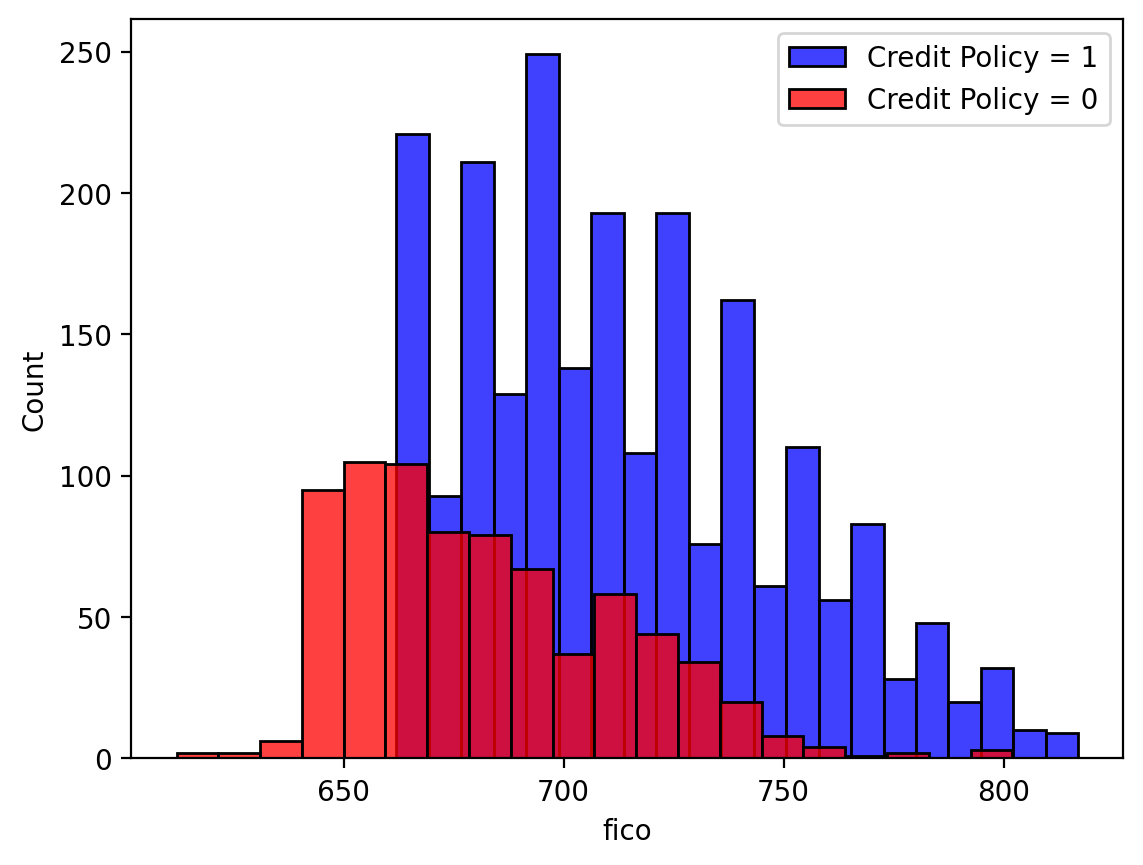

In [14]:
xaxis=loans[loans['credit.policy'] == 1]['fico']
yaxis=loans[loans['credit.policy'] == 0]['fico']
sns.histplot(data=loans,x=xaxis, label='Credit Policy = 1',color = 'blue')
sns.histplot(data=loans,x=yaxis ,label='Credit Policy = 0',color = 'red')
plt.legend()

**Create another histogram for `not.fully.paid` column.**

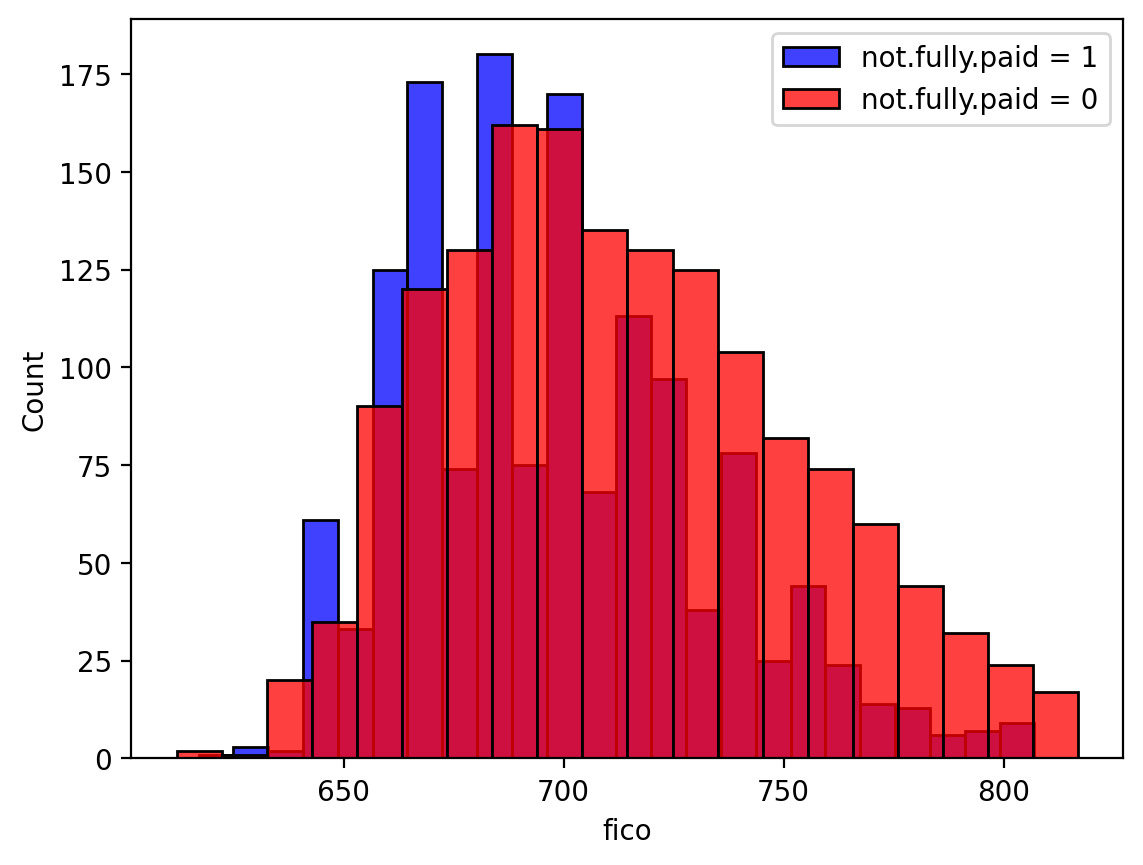

In [15]:
xaxis=loans[loans['not.fully.paid'] == 1]['fico']
yaxis=loans[loans['not.fully.paid'] == 0]['fico']
sns.histplot(data=loans,x=xaxis, label='not.fully.paid = 1',color ='blue')
sns.histplot(data=loans,x=yaxis ,label='not.fully.paid = 0',color ='red' )
plt.legend()

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

<AxesSubplot:xlabel='count', ylabel='purpose'>

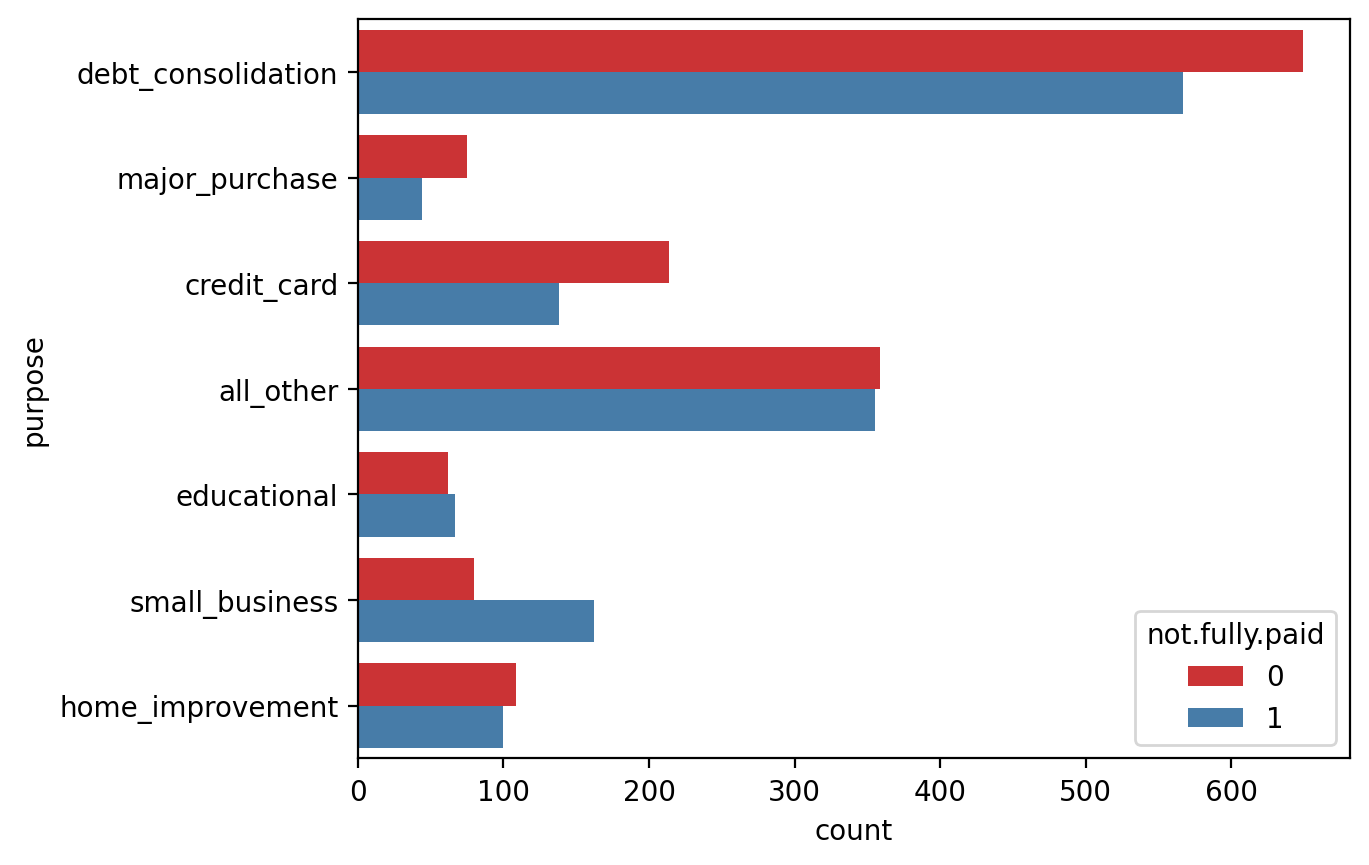

In [16]:
sns.countplot(data=loans,y = 'purpose',hue='not.fully.paid',palette='Set1')

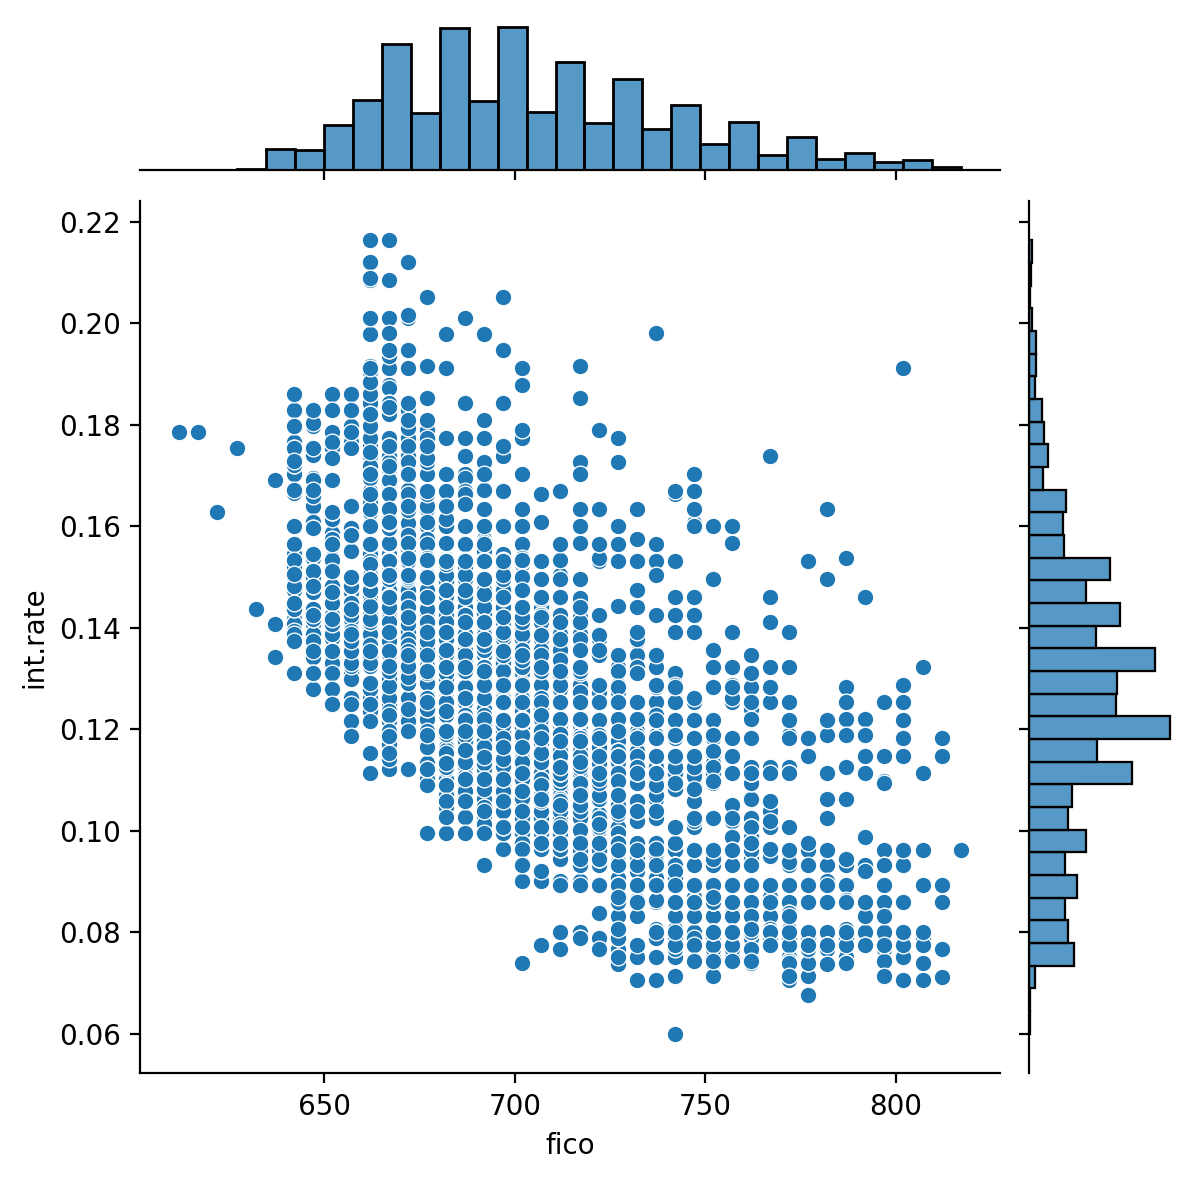

In [17]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans)

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

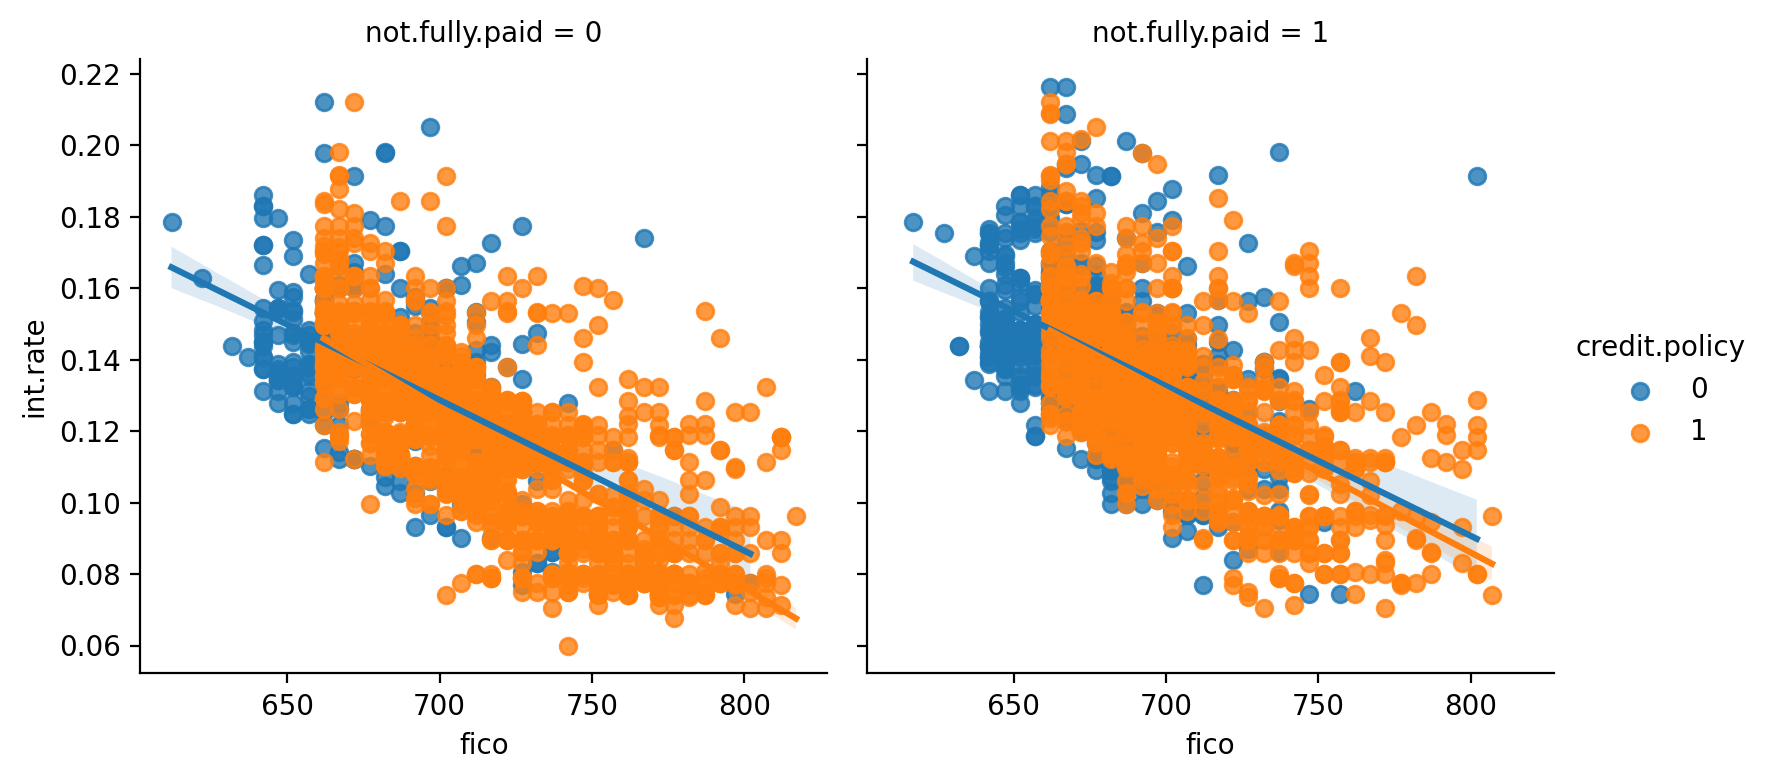

In [18]:
sns.lmplot(
    data=loans, x="fico", y="int.rate",
    hue="credit.policy", col="not.fully.paid", height=4,
)

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [20]:
cat_feats = ['purpose']

In [21]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [23]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [26]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot:>

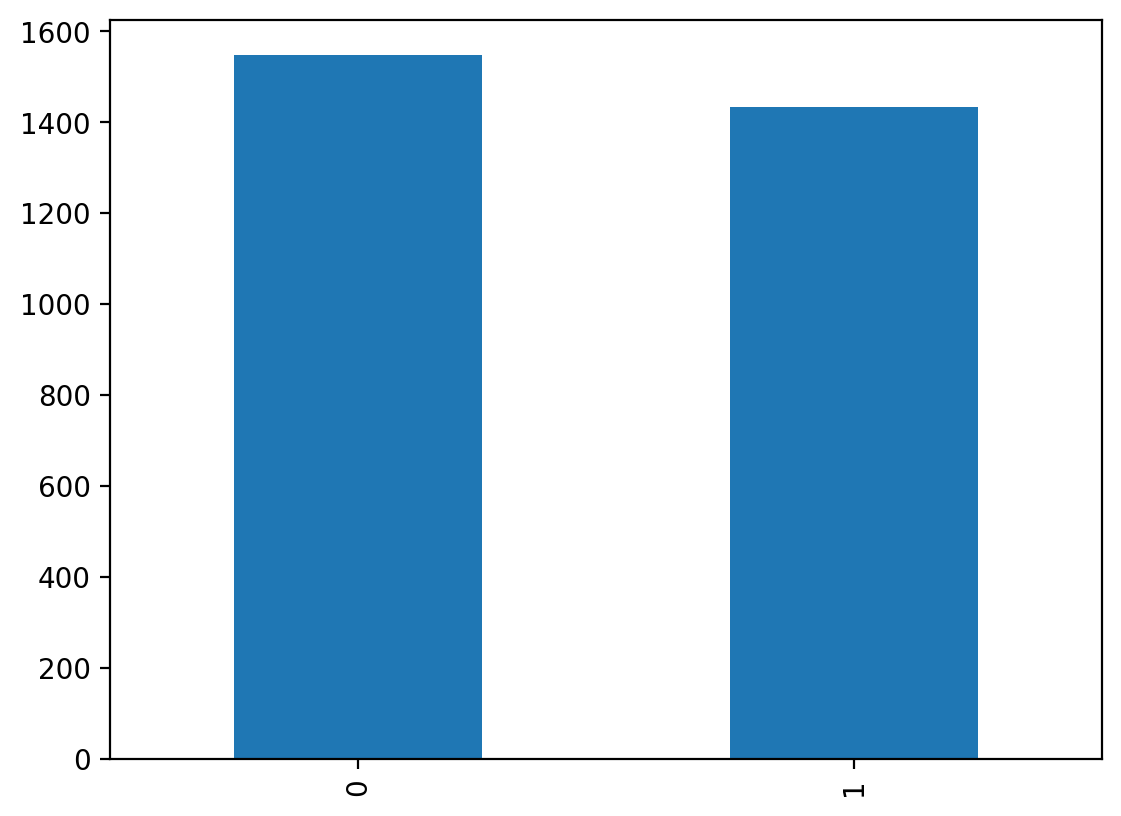

In [27]:
y.value_counts().plot(kind='bar')

<AxesSubplot:>

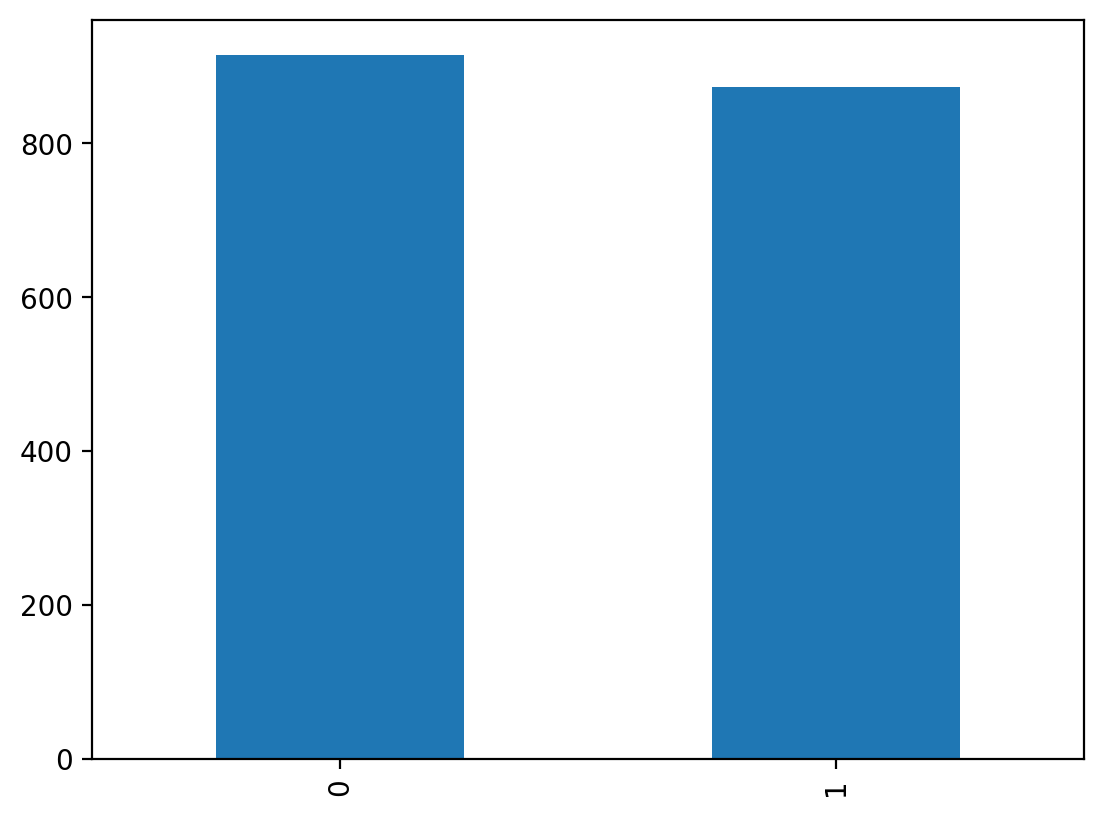

In [28]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

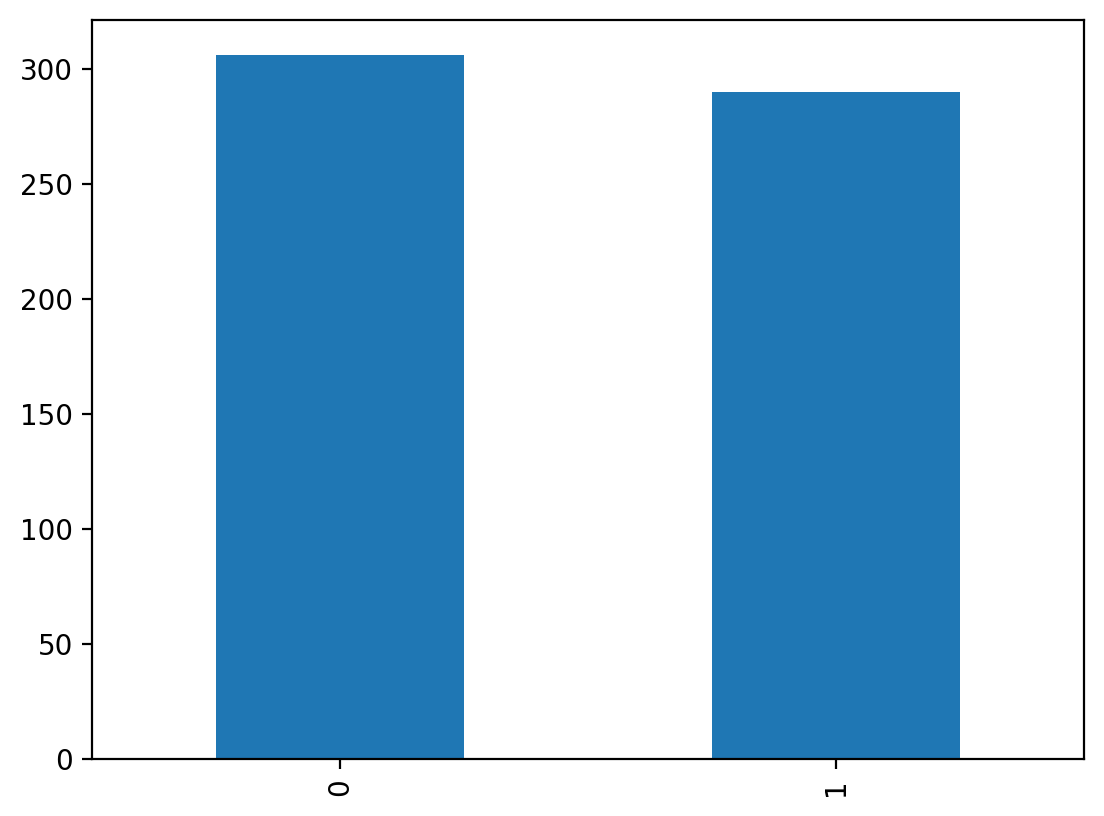

In [29]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

# 1

In [30]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
predict_train = dtree.predict(X_train)
predict_test = dtree.predict(X_test)

In [34]:
print("Training accuracy",metrics.accuracy_score(y_train,predict_train)*100)
print("Testing accuracy is ", metrics.accuracy_score(y_test,predict_test)*100)

Training accuracy 100.0
Testing accuracy is  56.78391959798995


# Confusion Matrix

In [35]:
cm=sklearn.metrics.confusion_matrix(y_test, predict_test,labels=None, sample_weight=None, normalize=None)
print(cm)

[[180 147]
 [111 159]]


In [36]:
print(metrics.classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       327
           1       0.52      0.59      0.55       270

    accuracy                           0.57       597
   macro avg       0.57      0.57      0.57       597
weighted avg       0.57      0.57      0.57       597



In [37]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)


TRUE Negative 180
FALSE POSITIVE 147
FALSE NEGATIVE 111
TRUE Positive 159


In [38]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.5888888888888889
False Positive Rate: 0.44954128440366975
Specificity: 0.5504587155963303


# 2

2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Min_sample_split

In [39]:
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50]
)

params

{'min_samples_split': [5, 10, 20, 30, 40, 50]}

In [40]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=None, n_jobs=-1, )
gs

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='f1')

In [41]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='f1')

In [42]:
gs.best_estimator_

DecisionTreeClassifier(min_samples_split=50)

In [43]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
gs.best_params_

{'min_samples_split': 50}

In [45]:
best_estimator = gs.best_estimator_
best_estimator.get_depth()

17

In [46]:
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.576214405360134

In [47]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       327
           1       0.53      0.49      0.51       270

    accuracy                           0.58       597
   macro avg       0.57      0.57      0.57       597
weighted avg       0.57      0.58      0.57       597



In [48]:
cm=metrics.confusion_matrix(y_test, pred)
print(cm)

[[212 115]
 [138 132]]


In [49]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)


TRUE Negative 212
FALSE POSITIVE 115
FALSE NEGATIVE 138
TRUE Positive 132


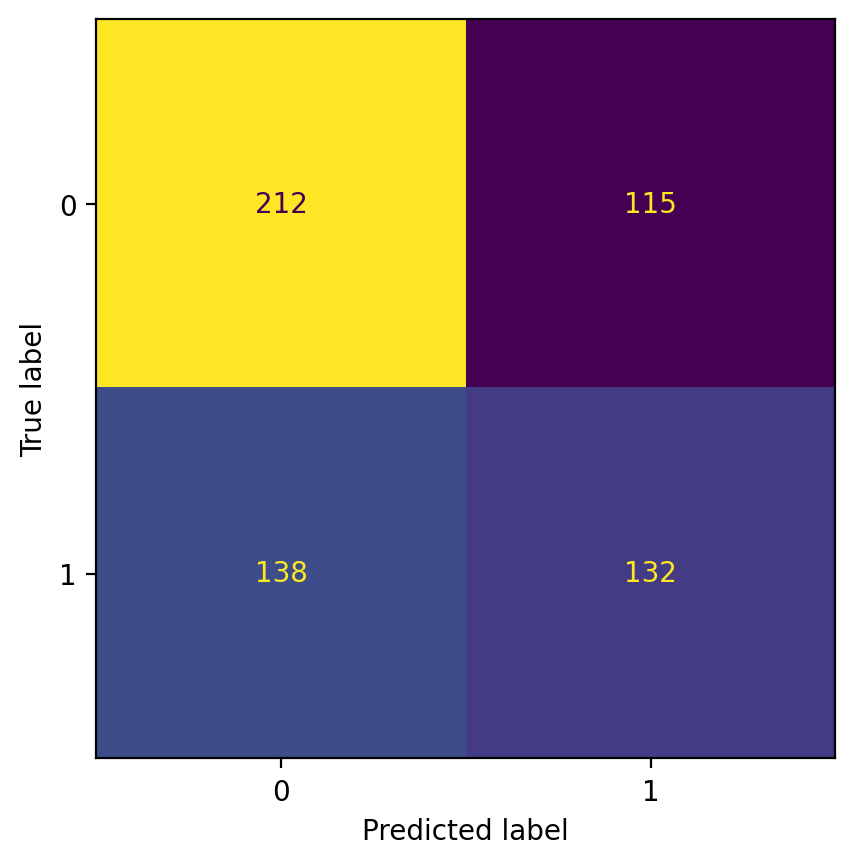

In [50]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

In [51]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.4888888888888889
False Positive Rate: 0.3516819571865443
Specificity: 0.6483180428134556


# max_depth

In [52]:
params = dict(
    max_depth = [1,2,3,5,7,10,None]
)

params

{'max_depth': [1, 2, 3, 5, 7, 10, None]}

In [53]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=None, n_jobs=-1, )
gs

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10, None]}, scoring='f1')

In [54]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10, None]}, scoring='f1')

In [55]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [56]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [57]:
gs.best_params_

{'max_depth': 1}

In [58]:
best_estimator = gs.best_estimator_
best_estimator.get_depth()

1

In [59]:
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.5326633165829145

In [60]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



In [61]:
cm=metrics.confusion_matrix(y_test, pred)
print(cm)

[[ 75 252]
 [ 27 243]]


In [62]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)


TRUE Negative 75
FALSE POSITIVE 252
FALSE NEGATIVE 27
TRUE Positive 243


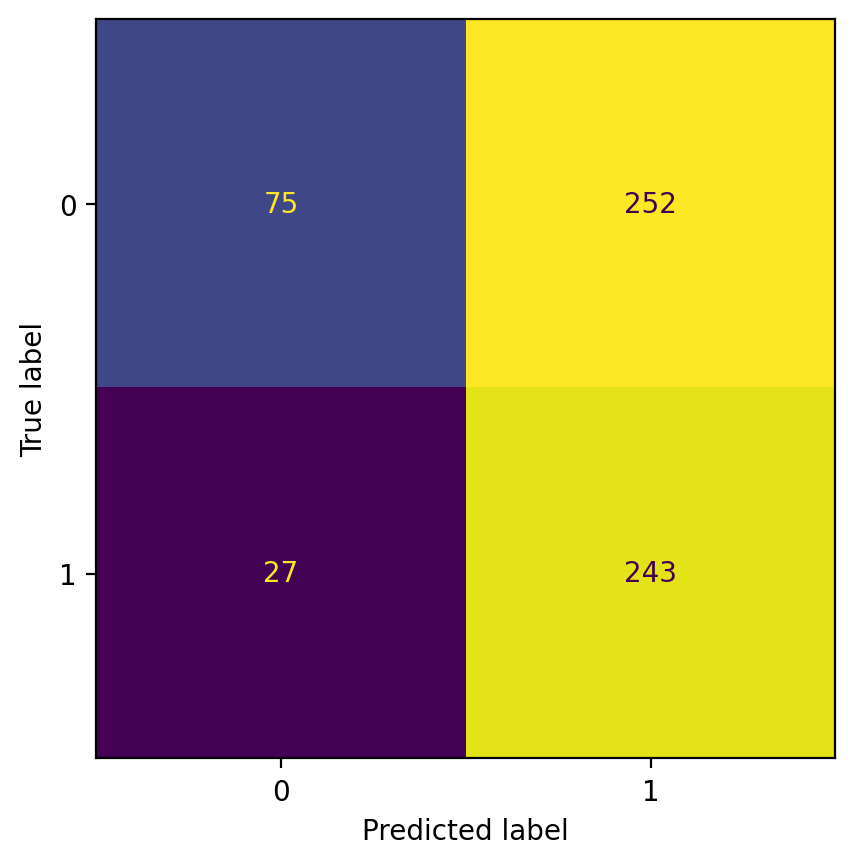

In [63]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

In [64]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.9
False Positive Rate: 0.7706422018348624
Specificity: 0.22935779816513763


# min_samples_split and max_depth

In [65]:
params = dict(
    min_samples_split = [2,4,6, 8, 9, 10],
    max_depth = [1,2,3]
)

params

{'min_samples_split': [2, 4, 6, 8, 9, 10], 'max_depth': [1, 2, 3]}

In [66]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=None, n_jobs=-1, )
gs

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 9, 10]},
             scoring='f1')

In [67]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 9, 10]},
             scoring='f1')

In [68]:
gs.best_estimator_


DecisionTreeClassifier(max_depth=1)

In [69]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [70]:
gs.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [71]:
best_estimator = gs.best_estimator_
best_estimator.get_depth()

1

In [72]:
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)


0.5326633165829145

In [73]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



In [74]:
cm=metrics.confusion_matrix(y_test, pred)
print(cm)

[[ 75 252]
 [ 27 243]]


In [75]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)


TRUE Negative 75
FALSE POSITIVE 252
FALSE NEGATIVE 27
TRUE Positive 243


In [76]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.9
False Positive Rate: 0.7706422018348624
Specificity: 0.22935779816513763


# 3

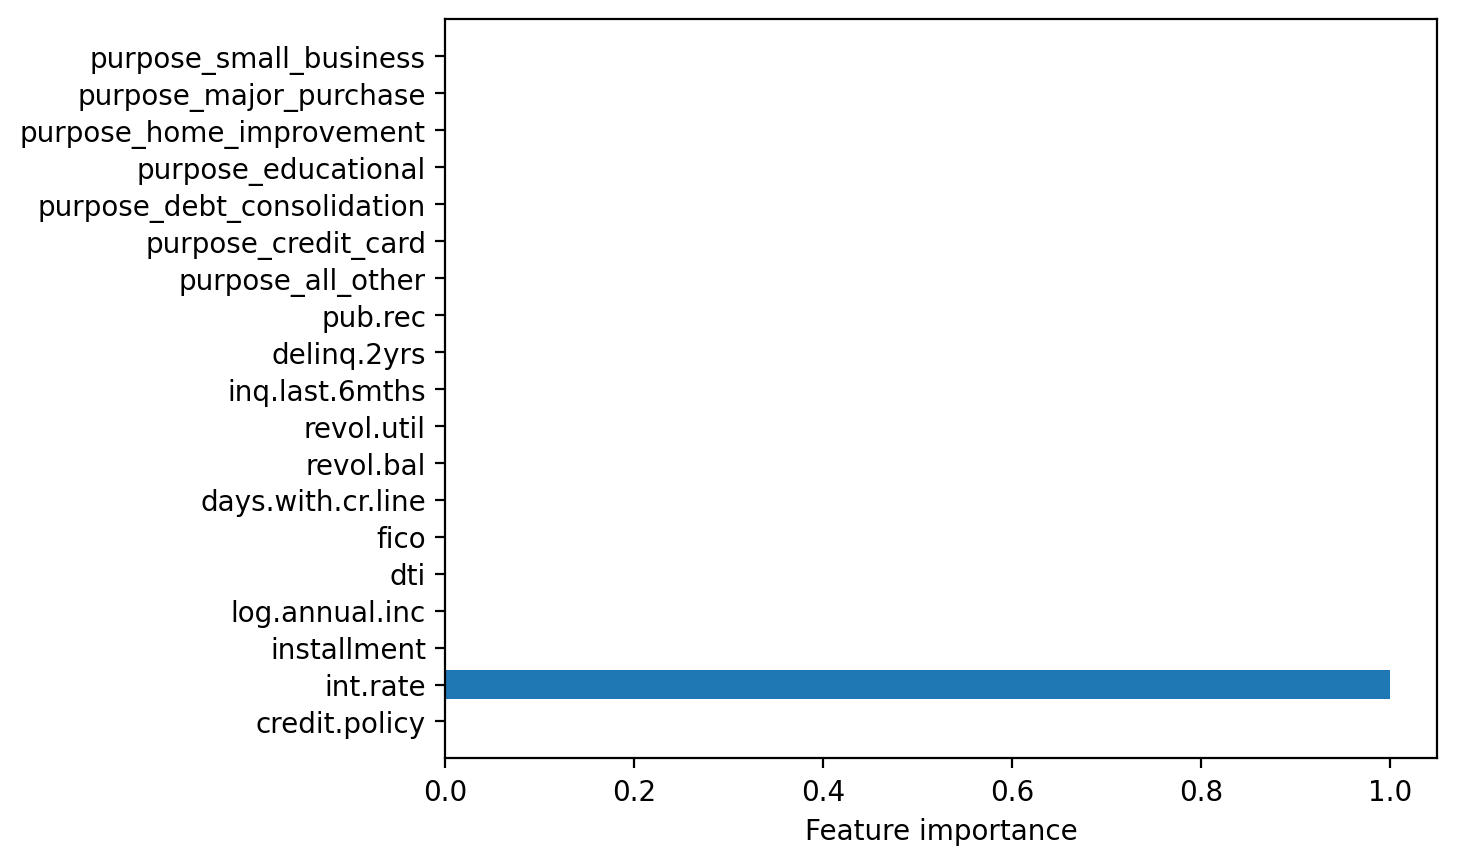

In [77]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [78]:
#1
from sklearn.ensemble import RandomForestClassifier

In [79]:

rforest = RandomForestClassifier(n_estimators = 100)


In [80]:
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
# Training Accuracy
predict=rforest.predict(X_train)
print("Training accuracy",metrics.accuracy_score(y_train,predict)*100)

Training accuracy 100.0


In [82]:
# Testing Accuracy
y_predict = rforest.predict(X_test)
print("Testing accuracy is ", metrics.accuracy_score(y_test,y_predict)*100)


Testing accuracy is  59.96649916247906


In [83]:
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[202 125]
 [114 156]]


In [84]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       327
           1       0.56      0.58      0.57       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [85]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 202
FALSE POSITIVE 125
FALSE NEGATIVE 114
TRUE Positive 156


In [86]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.5777777777777777
False Positive Rate: 0.382262996941896
Specificity: 0.617737003058104


# 2

In [87]:
params = dict(
    min_samples_split = [2,4,6, 8, 9, 10],
    max_depth = [1,2,3]
)

params

{'min_samples_split': [2, 4, 6, 8, 9, 10], 'max_depth': [1, 2, 3]}

In [88]:
rforest = RandomForestClassifier(n_estimators = 100)
gs = GridSearchCV(estimator=rforest, param_grid=params, scoring='f1', cv=None, n_jobs=-1, )
gs

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 9, 10]},
             scoring='f1')

In [89]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 9, 10]},
             scoring='f1')

In [90]:
gs.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_split=8)

In [91]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [92]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 8}

In [93]:
best_estimator = gs.best_estimator_


In [94]:
pred = best_estimator.predict(X_test)

In [95]:
metrics.accuracy_score(y_test, pred)

0.6130653266331658

In [96]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       327
           1       0.59      0.49      0.53       270

    accuracy                           0.61       597
   macro avg       0.61      0.60      0.60       597
weighted avg       0.61      0.61      0.61       597



In [97]:
cm=metrics.confusion_matrix(y_test, pred)
print(cm)

[[234  93]
 [138 132]]


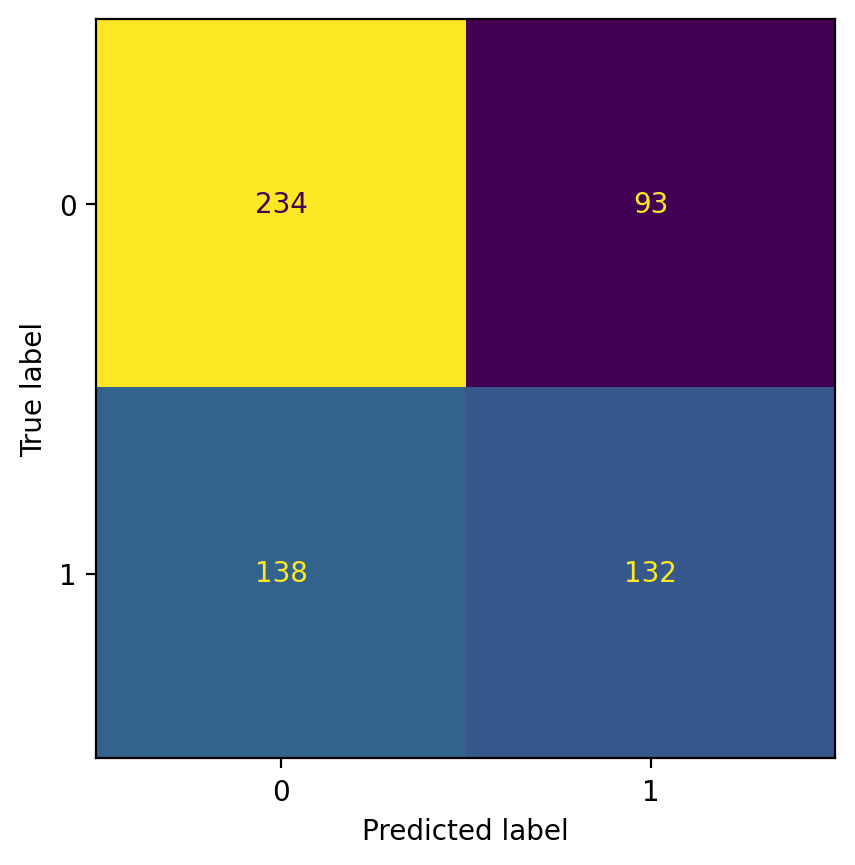

In [98]:

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

In [99]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 234
FALSE POSITIVE 93
FALSE NEGATIVE 138
TRUE Positive 132


In [100]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.4888888888888889
False Positive Rate: 0.28440366972477066
Specificity: 0.7155963302752294


# 3

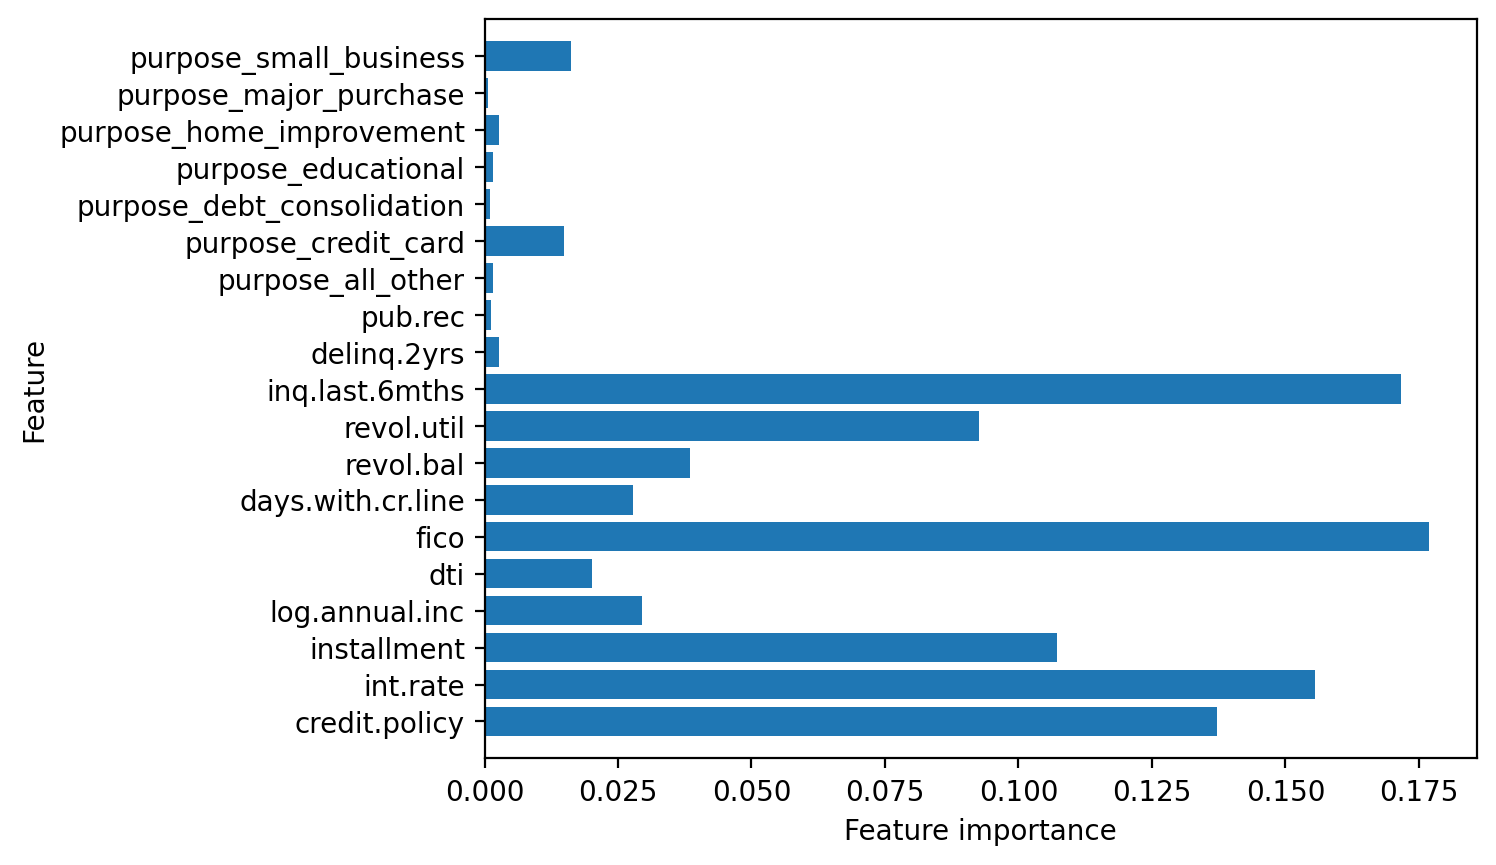

In [101]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

1

In [187]:
from sklearn.ensemble import AdaBoostClassifier

In [188]:
ada=AdaBoostClassifier(n_estimators=50)


In [189]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [190]:
# Training Accuracy
predict=ada.predict(X_train)
print("Training accuracy",metrics.accuracy_score(y_train,predict)*100)

Training accuracy 67.39373601789708


In [191]:
# Testing Accuracy
y_predict = ada.predict(X_test)
print("Testing accuracy is ", metrics.accuracy_score(y_test,y_predict)*100)


Testing accuracy is  59.798994974874375


In [192]:
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[198 129]
 [111 159]]


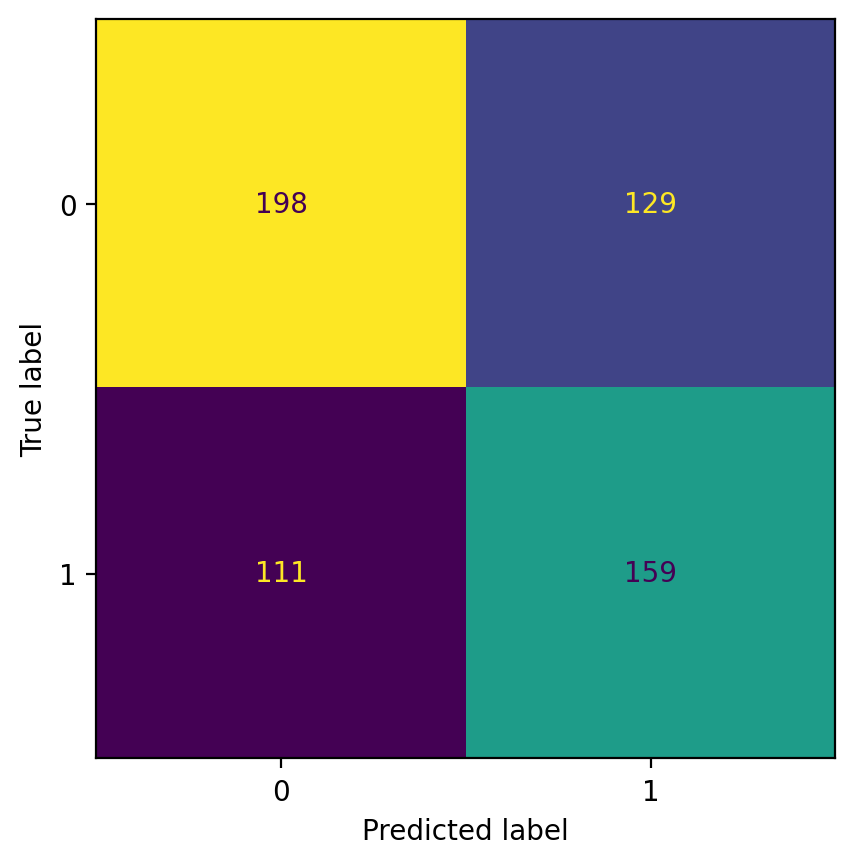

In [193]:

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict, colorbar=False);

In [194]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62       327
           1       0.55      0.59      0.57       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [195]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 198
FALSE POSITIVE 129
FALSE NEGATIVE 111
TRUE Positive 159


In [196]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.5888888888888889
False Positive Rate: 0.3944954128440367
Specificity: 0.6055045871559633


2

In [222]:
params = dict(
    n_estimators = [50,100,200,3000,400],
    learning_rate = [0.1,1.0,2,2.5,3.5]
)

params

{'n_estimators': [50, 100, 200, 3000, 400],
 'learning_rate': [0.1, 1.0, 2, 2.5, 3.5]}

In [223]:
ada=AdaBoostClassifier()
gs = GridSearchCV(estimator=ada, param_grid=params, scoring='f1', cv=None, n_jobs=-1, )
gs

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0, 2, 2.5, 3.5],
                         'n_estimators': [50, 100, 200, 3000, 400]},
             scoring='f1')

In [224]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0, 2, 2.5, 3.5],
                         'n_estimators': [50, 100, 200, 3000, 400]},
             scoring='f1')

In [225]:
gs.best_estimator_


AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [226]:
gs.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': None}

In [227]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [228]:
best_estimator = gs.best_estimator_


In [229]:
pred = best_estimator.predict(X_test)

In [230]:
metrics.accuracy_score(y_test, pred)

0.5946398659966499

In [231]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       327
           1       0.55      0.55      0.55       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.59      0.59      0.59       597



In [232]:
cm=metrics.confusion_matrix(y_test, pred)
print(cm)


[[206 121]
 [121 149]]


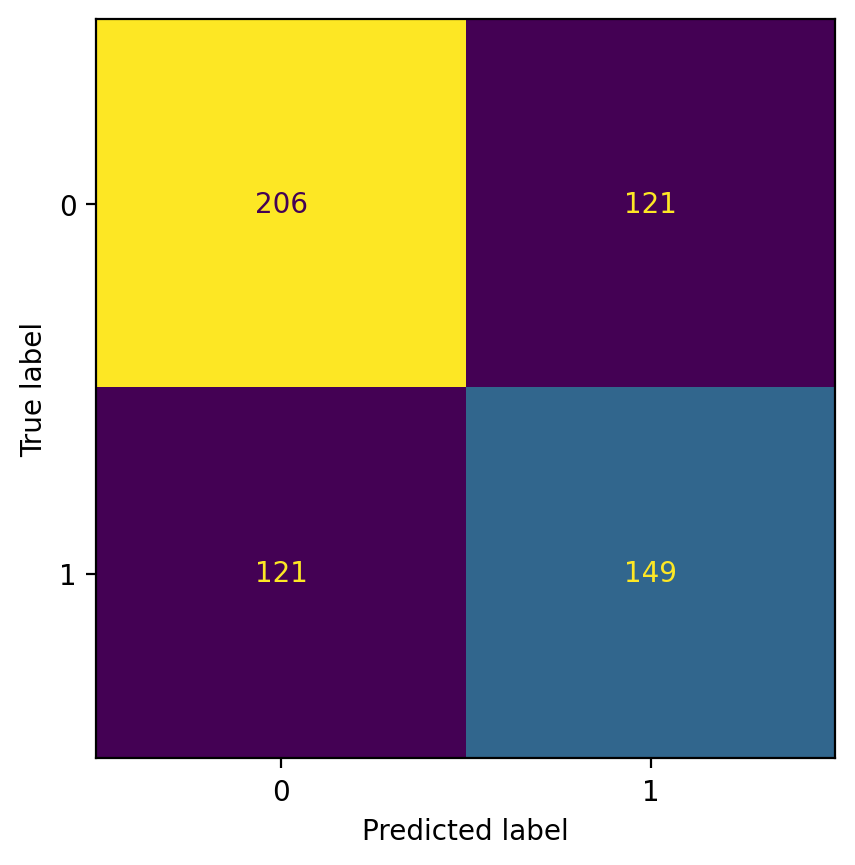

In [233]:

metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

In [234]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 206
FALSE POSITIVE 121
FALSE NEGATIVE 121
TRUE Positive 149


In [235]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.5518518518518518
False Positive Rate: 0.37003058103975534
Specificity: 0.6299694189602446


3

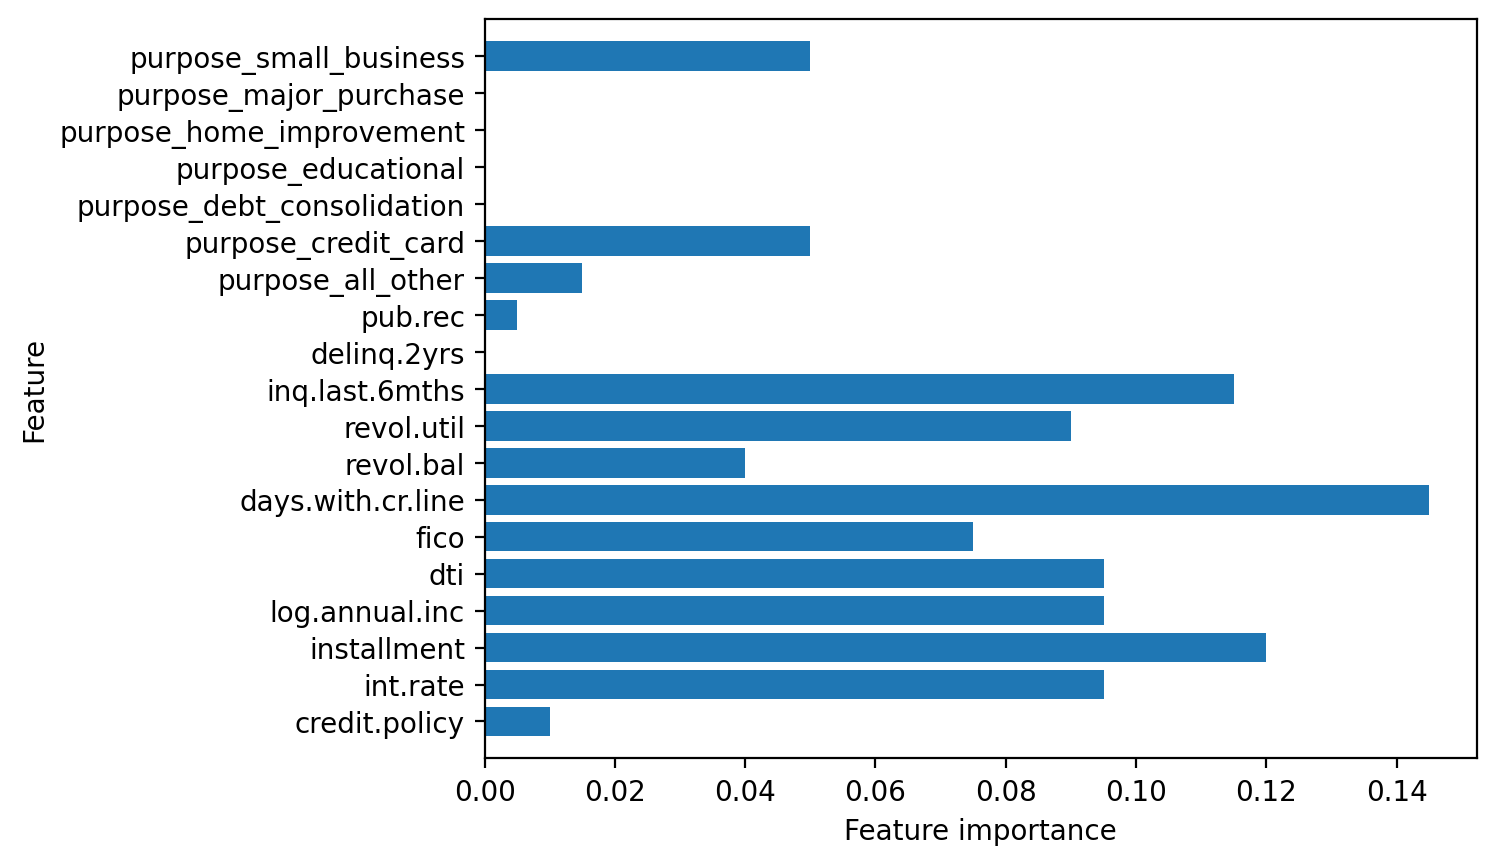

In [236]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

1

In [263]:
from sklearn.ensemble import GradientBoostingClassifier

In [264]:
Grad=GradientBoostingClassifier(n_estimators=100)

In [265]:
Grad.fit(X_train, y_train)

GradientBoostingClassifier()

In [266]:
# Training Accuracy
predict=Grad.predict(X_train)
print("Training accuracy",metrics.accuracy_score(y_train,predict)*100)

Training accuracy 79.86577181208054


In [267]:
# Testing Accuracy
y_predict = Grad.predict(X_test)
print("Testing accuracy is ", metrics.accuracy_score(y_test,y_predict)*100)

Testing accuracy is  60.63651591289783


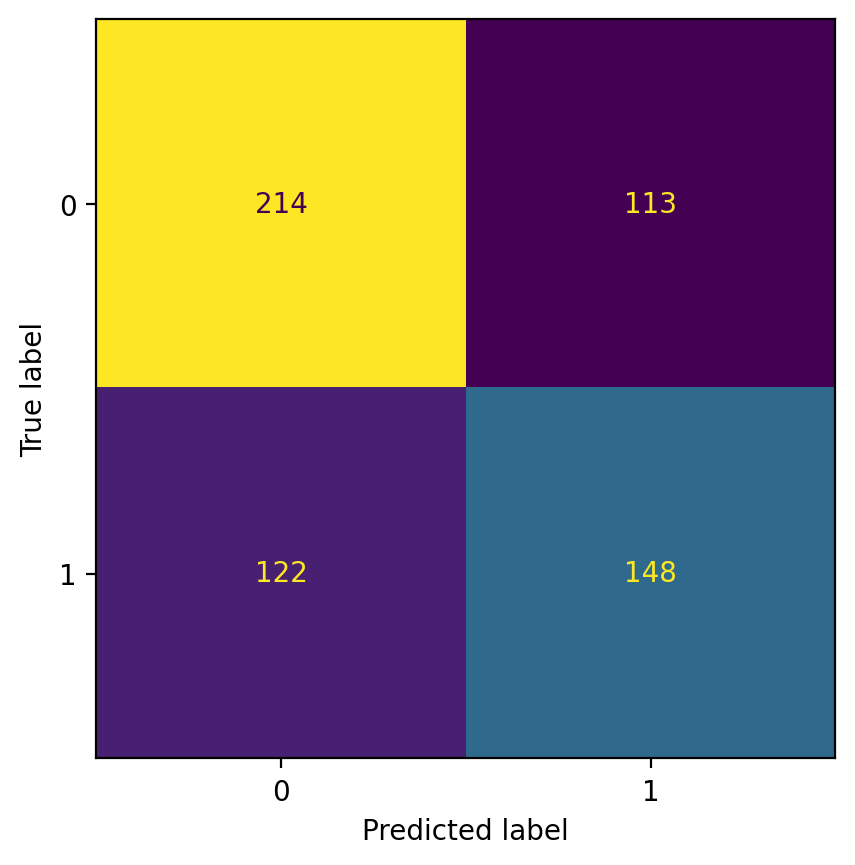

In [268]:

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict, colorbar=False);

In [269]:
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[214 113]
 [122 148]]


In [270]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       327
           1       0.57      0.55      0.56       270

    accuracy                           0.61       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.61      0.61      0.61       597



In [271]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 214
FALSE POSITIVE 113
FALSE NEGATIVE 122
TRUE Positive 148


In [272]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.5481481481481482
False Positive Rate: 0.345565749235474
Specificity: 0.654434250764526


2

In [273]:
params = dict(
    n_estimators = [50,100,200,300,400],
    learning_rate= [0.1,1.0,2,2.5,3.5]
)

params

{'n_estimators': [50, 100, 200, 300, 400],
 'learning_rate': [0.1, 1.0, 2, 2.5, 3.5]}

In [274]:
Grad=GradientBoostingClassifier()
gs = GridSearchCV(estimator=Grad, param_grid=params, scoring='f1', cv=None, n_jobs=-1, )
gs

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0, 2, 2.5, 3.5],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='f1')

In [275]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0, 2, 2.5, 3.5],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='f1')

In [276]:
gs.best_estimator_


GradientBoostingClassifier()

In [277]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [278]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [279]:
pred = best_estimator.predict(X_test)

In [280]:
metrics.accuracy_score(y_test, pred)

0.5946398659966499

In [281]:
cm=metrics.confusion_matrix(y_test, pred)
print(cm)

[[206 121]
 [121 149]]


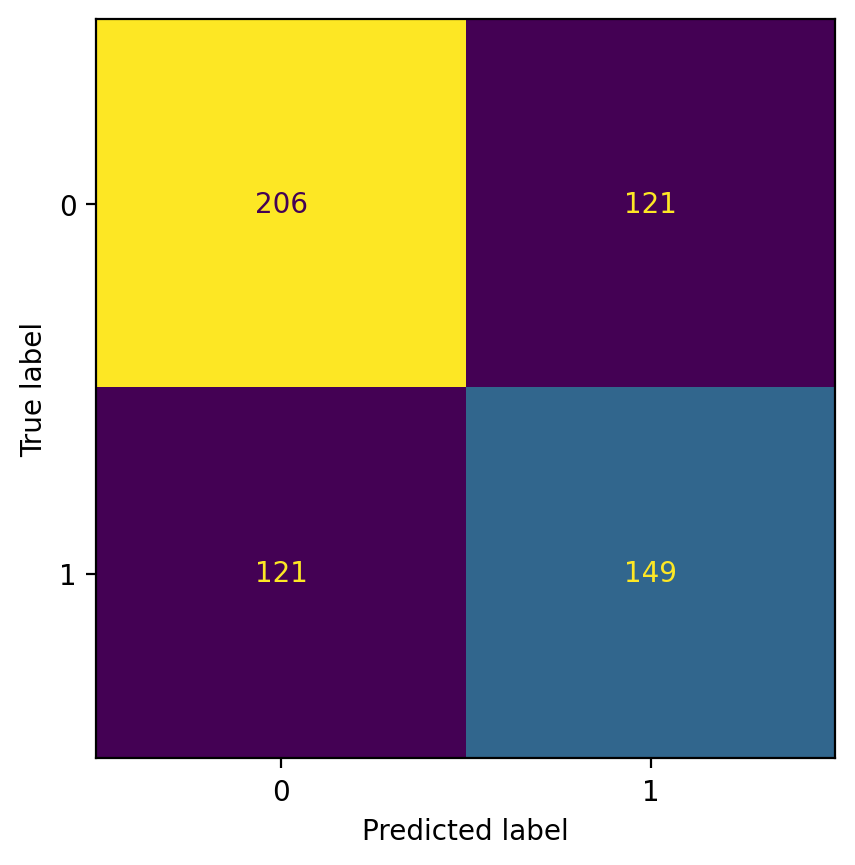

In [282]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

In [283]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       327
           1       0.55      0.55      0.55       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.59      0.59      0.59       597



In [284]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 206
FALSE POSITIVE 121
FALSE NEGATIVE 121
TRUE Positive 149


In [285]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.5518518518518518
False Positive Rate: 0.37003058103975534
Specificity: 0.6299694189602446


3

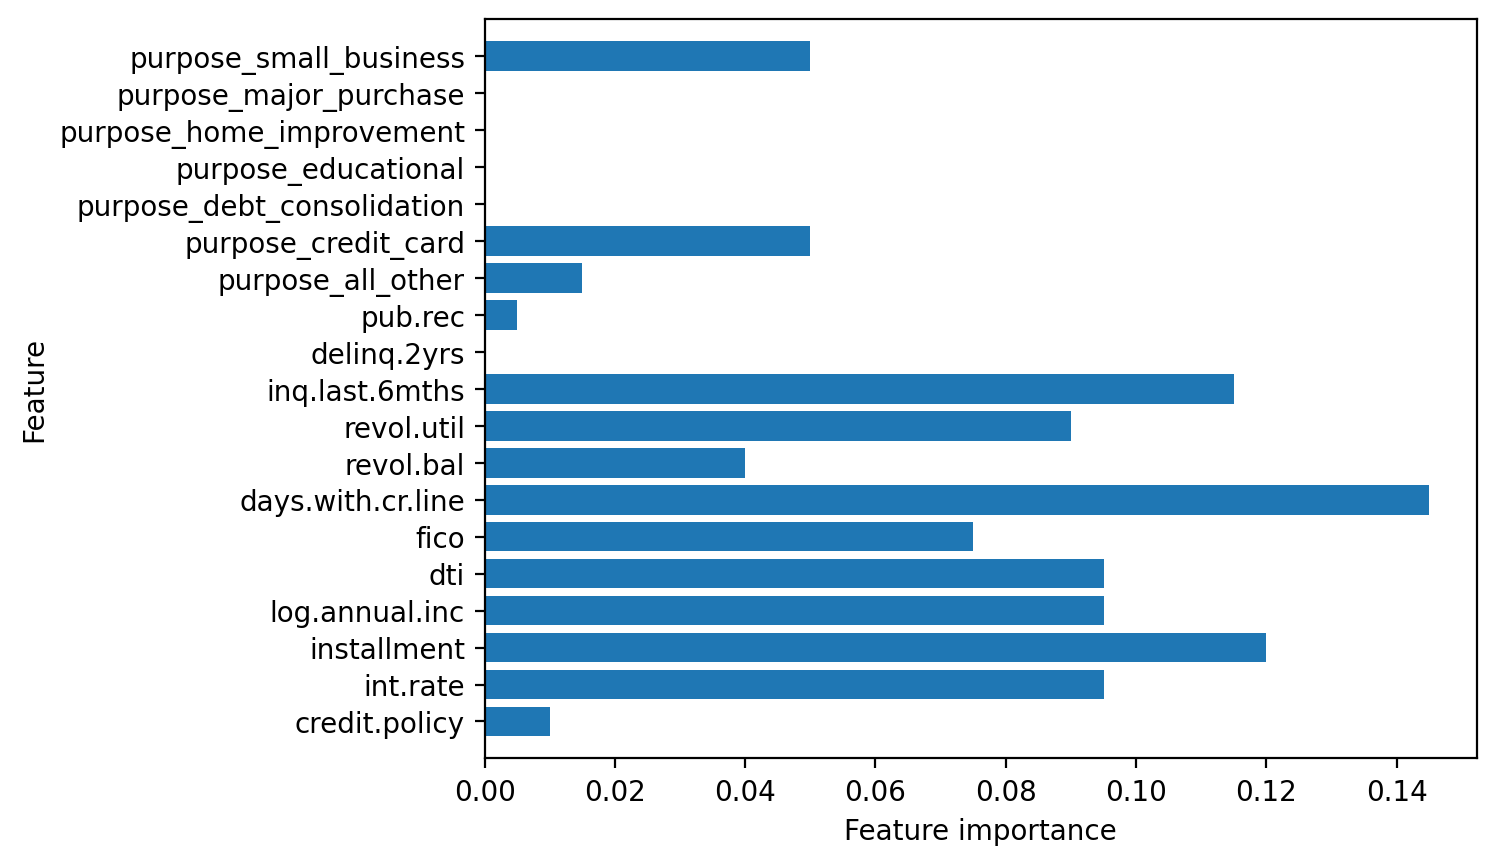

In [286]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

By increasing n_estimators we can often improve recall while decreasing max_depth can help improve precision. Here, I am  experiment with different values for these parameters to find the best trade-off for your particular use case.

In [287]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
cv

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [288]:
from sklearn.metrics import recall_score, f1_score

n_estimators_range = np.arange(100, 620, 100)
max_depth_range = np.arange(1,5)

# Create a dictionary of hyperparameters to search
param_grid = {'n_estimators': n_estimators_range, 'max_depth': max_depth_range}

clf = RandomForestClassifier()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='recall')
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train a new classifier using the best parameters
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the F1-score and recall on the test set
f1_score_val = f1_score(y_test, y_pred)
recall_score_val = recall_score(y_test, y_pred)

print("F1-score:", f1_score_val)
print("Recall:", recall_score_val)


Best parameters: {'max_depth': 4, 'n_estimators': 400}
F1-score: 0.5499058380414312
Recall: 0.5407407407407407


Our model F1 score and recall increase just a little bit, it doesn't have huge impact of F1 score and recall.

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

# Decision Tree

In [289]:
clf = DecisionTreeClassifier( max_depth=1,min_samples_split=2)
clf = clf.fit(X_train,y_train)

In [290]:
y_pred = clf.predict(X_test)

In [291]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5326633165829145


In [292]:
cm=metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 75, 252],
       [ 27, 243]])

In [293]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 75
FALSE POSITIVE 252
FALSE NEGATIVE 27
TRUE Positive 243


In [294]:
#calculate the False Positive Rate (FPR)
FPR = FP / (FP + TN)
# TRUE POSITIVE RATE
TPR = TP / (TP + FN)
# calculate the Specificity
Specificity = TN / (TN + FP)
print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)
print("Specificity:", Specificity)

True Positive Rate: 0.9
False Positive Rate: 0.7706422018348624
Specificity: 0.22935779816513763


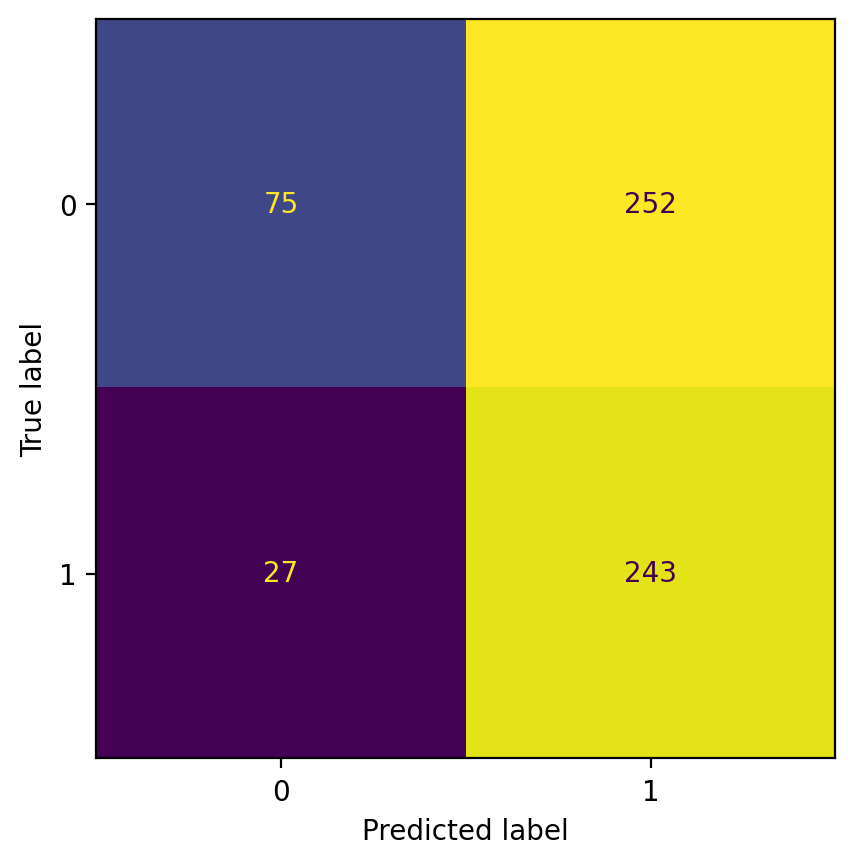

In [295]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

In [296]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



# Random Forest

In [297]:
clf=RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_split=8)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [298]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5979899497487438


In [299]:
cm=metrics.confusion_matrix(y_test, y_pred)
cm

array([[213, 114],
       [126, 144]])

In [300]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 213
FALSE POSITIVE 114
FALSE NEGATIVE 126
TRUE Positive 144


In [301]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       327
           1       0.56      0.53      0.55       270

    accuracy                           0.60       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.60      0.60      0.60       597



# Ada Boost

In [303]:
m1 = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
model = m1.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [304]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5946398659966499


In [305]:
cm=metrics.confusion_matrix(y_test, y_pred)
cm

array([[206, 121],
       [121, 149]])

In [306]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 206
FALSE POSITIVE 121
FALSE NEGATIVE 121
TRUE Positive 149


In [307]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       327
           1       0.55      0.55      0.55       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.59      0.59      0.59       597



# Gradient boosting

In [308]:
m2 = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
model = m2.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [309]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6063651591289783


In [310]:
cm=metrics.confusion_matrix(y_test, y_pred)
cm

array([[214, 113],
       [122, 148]])

In [311]:
TN, FP, FN, TP = cm.ravel()

print("TRUE Negative",TN)
print("FALSE POSITIVE",FP)
print("FALSE NEGATIVE",FN)
print('TRUE Positive',TP)

TRUE Negative 214
FALSE POSITIVE 113
FALSE NEGATIVE 122
TRUE Positive 148


In [312]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       327
           1       0.57      0.55      0.56       270

    accuracy                           0.61       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.61      0.61      0.61       597



# Gradient boosting has highest accuracy as compared to another one, So our best model in gradient boosting.